# To run this successfully, run every cell from top to bottom

### Note: Every cell has already been run by me, and results are shown, so there is no need to actually run everything.

In [776]:
# For the purpose of this project, I used a dataset I found in Kaggle, called "Fashion-MNIST" which is a slight
# variation to the commonly known MNIST dataset. I decided to use the "Fashion-MNIST" dataset just to differ from 
# the others hehe.

In [777]:
# Here we import all the need libraries

import pandas as pd
import numpy as np
import heapq
import timeit

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import classification_report

In [778]:
# Load the datasets from the FashionMNIST folder.

data_train = pd.read_csv("./FashionMNIST/fashion-mnist_train.csv")
data_test = pd.read_csv("./FashionMNIST/fashion-mnist_test.csv")

In [779]:
# Dictionary to indicate which class number corresponds to which type of clothing

fashionmnist = {
    "0": "T-shirt/top",
    "1": "Trouser",
    "2": "Pullover",
    "3": "Dress",
    "4": "Coat",
    "5": "Sandal",
    "6": "Shirt",
    "7": "Sneaker",
    "8": "Bag",
    "9": "Ankle boot",
}

In [780]:
# Representation of how the dataset looks like.

data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [781]:
# Split the train and test dataframes into features(X) and labels(Y)

X_train = data_train.drop(["label"],axis=1)
Y_train = data_train[["label"]].values.ravel()
X_test = data_test.drop(["label"],axis=1)
Y_test = data_test[["label"]].values.ravel()

# I used .ravel() due to some inconsistences with the dataset (..Thanks StackOverflow :D)

# Also, since all features range from 0 to 255, we don't need to normalize them.

In [782]:
# We can look at how many rows and columns each dataset has

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [783]:
# Function to create different kind of sizes for training datasets (For testing purposes)

def create_dataset(size):
    """makes a dataset of size "size", and returns that datasets images and targets
    This is used to make the dataset that will be stored by a model and used in 
    experimenting with different stored dataset sizes
    """
    small_x_train = X_train[:size]
    small_y_train = Y_train[:size]
    
    return small_x_train, small_y_train


In [784]:
# Function to create different kind of sizes for testing datasets (For testing purposes)

def create_test_dataset(size):
    """makes a dataset of size "size", and returns that datasets images and targets
    This is used to make the dataset that will be tested by a model and used in 
    experimenting with different test dataset sizes
    """
    small_x_test = X_test[:size]
    small_y_test = Y_test[:size]
    
    return small_x_test, small_y_test

In [785]:
# Smaller train set of 1000 rows (I put it 60000 for the final project)

small_x_train, small_y_train = create_dataset(60000)

small_x_train.shape, small_y_train.shape

((60000, 784), (60000,))

In [786]:
# Smaller test set of 1000 rows (I put it 10000 for the final project)

small_x_test, small_y_test = create_test_dataset(10000)

small_x_test.shape, small_y_test.shape

((10000, 784), (10000,))

In [787]:
# Import some important libraries and features

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## READY MLP:

I used the **sklearn**-implemented **Multilayer Perceptron** Classifier like this:

mlp = MLPClassifier(hidden_layer_sizes = (**20**), activation = '**logistic**', batch_size=**250**, 
                    learning_rate_init = **0.001**, random_state = 1)



In [792]:
# Initialize the mlp given from the sklearn library
# Predictions on the test set (88%)

start = timeit.default_timer()
mlp = MLPClassifier(hidden_layer_sizes = (100), activation = 'logistic', batch_size=750, 
                    learning_rate_init = 0.0002, random_state = 1, early_stopping=True)

mlp.fit(small_x_train,small_y_train)

pred = mlp.predict(small_x_test)

print(classification_report(small_y_test, pred))
stop = timeit.default_timer()

    
print('Time: ', stop - start)



              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1000
           1       0.98      0.97      0.97      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.90      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.93      0.95      1000
           6       0.70      0.67      0.68      1000
           7       0.91      0.94      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Time:  197.48854950000532


### Confusion Matrix on test set prediction

In [793]:
print(confusion_matrix(small_y_test, pred))

[[819   1  15  38   2   0 114   0  11   0]
 [  0 973   2  14   4   2   5   0   0   0]
 [  9   1 811  14  86   0  74   0   5   0]
 [ 24  18  13 902  26   1  10   0   6   0]
 [  1   0  84  39 807   0  67   0   2   0]
 [  1   0   0   1   0 934   1  42   3  18]
 [134   4  78  33  69   0 670   0  12   0]
 [  0   0   0   0   0  24   0 941   1  34]
 [  4   0   6   1   4   3  16   4 961   1]
 [  0   0   0   0   0   6   0  43   1 950]]


### Loss curve with respect to the epochs (test set)

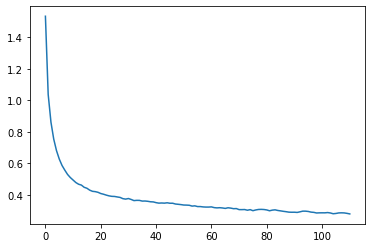

In [794]:
plt.plot(mlp.loss_curve_)

### Accuracy curve with respect to the epochs (test set)

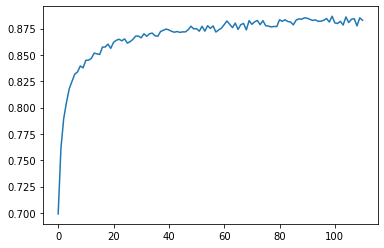

In [795]:
plt.plot(mlp.validation_scores_)

In [803]:
# Initialize the mlp given from the sklearn library
# Predictions on the training set (91%), it shows 90% because i needed to enable early_stopping to plot the accuracy curve.

start = timeit.default_timer()
mlp = MLPClassifier(hidden_layer_sizes = (100), activation = 'logistic', batch_size=750, 
                    learning_rate_init = 0.0002, random_state = 1, early_stopping=True)

mlp.fit(small_x_train,small_y_train)

pred = mlp.predict(small_x_train)

print(classification_report(small_y_train, pred))
stop = timeit.default_timer()

    
print('Time: ', stop - start)


              precision    recall  f1-score   support

           0       0.86      0.85      0.85      6000
           1       0.99      0.97      0.98      6000
           2       0.80      0.84      0.82      6000
           3       0.88      0.93      0.90      6000
           4       0.82      0.80      0.81      6000
           5       0.99      0.98      0.98      6000
           6       0.75      0.72      0.74      6000
           7       0.96      0.97      0.96      6000
           8       0.98      0.97      0.98      6000
           9       0.98      0.97      0.97      6000

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000

Time:  195.0973457999935


### Confusion Matrix on training set prediction

In [805]:
print(confusion_matrix(small_y_train, pred))

[[5079   17  104  206   21    4  529    0   38    2]
 [  10 5829   34   94   10    0   20    0    3    0]
 [  56    5 5041   68  474    2  341    0   13    0]
 [ 122   36   42 5552  144    0   92    0   12    0]
 [   7    5  562  228 4784    0  396    0   18    0]
 [   1    1    0    1    0 5861    1   82   10   43]
 [ 645   15  490  133  355    1 4321    1   39    0]
 [   0    0    0    0    0   47    0 5847    8   98]
 [  12    3   32   20   16    6   52   13 5845    1]
 [   2    0    0    0    0   28    0  177    0 5793]]


### Loss curve with respect to the epochs (test set)

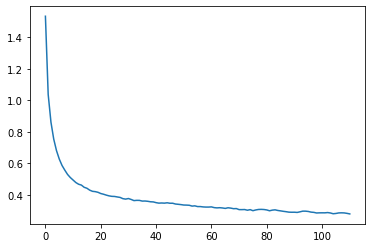

In [807]:
plt.plot(mlp.loss_curve_)

### Accuracy curve with respect to the epochs (test set)

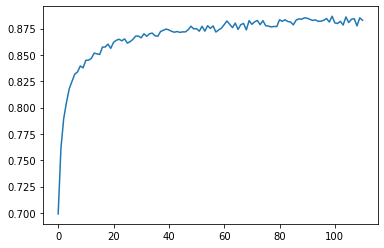

In [808]:
plt.plot(mlp.validation_scores_)

## Παράδειγμα εσφαλμένης κατηγοριοποίησης

Example of wrong classification:
Predicted: = T-shirt/top
True value: = Shirt


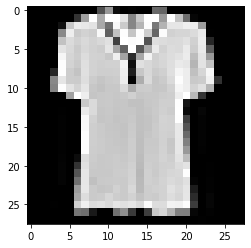

In [812]:
# Example of wrong classification

for i in range(len(pred)):
    if(pred[i]!=small_y_train[i]):
        c=i

print("Example of wrong classification:")
print("Predicted: = " + fashionmnist[str(pred[c])])
print("True value: = " + fashionmnist[str(small_y_train[c])])
image = small_x_train.iloc[c]
temp = np.array(image)
temp = np.reshape(temp, (28,28))
# plot the sample
fig = plt.figure
plt.imshow(temp, cmap='gray')
plt.show()

## Παράδειγμα σωστής κατηγοριοποίησης

Example of correct classification:
Predicted: = Sneaker
True value: = Sneaker


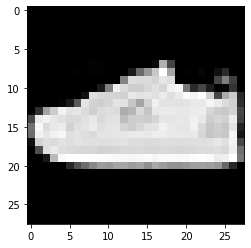

In [813]:
# Example of correct classification

for i in range(len(pred)):
    if(pred[i]==small_y_train[i]):
        c=i

print("Example of correct classification:")
print("Predicted: = " + fashionmnist[str(pred[c])])
print("True value: = " + fashionmnist[str(small_y_train[c])])
image = small_x_train.iloc[c]
temp = np.array(image)
temp = np.reshape(temp, (28,28))
# plot the sample
fig = plt.figure
plt.imshow(temp, cmap='gray')
plt.show()

# ΠΕΙΡΑΜΑΤΙΣΜΟΙ ΚΑΙ ΣΥΓΚΡΙΣΕΙΣ ΠΑΡΑΜΕΤΡΩΝ

## Πειραματισμός με διαφορετικα learning rates ( συγκρίσεις ακρίβειας ως προς πλήθος νευρώνων )

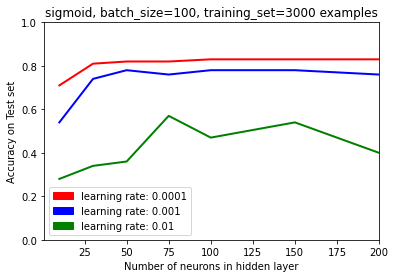

In [814]:
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
  
# x axis values 
x = [10,30,50,75,100,150,200] 

# corresponding y axis values 
no1 = [0.71,0.81,0.82,0.82,0.83,0.83,0.83] 
no2 = [0.54,0.74,0.78,0.76,0.78,0.78,0.76] 
no3 = [0.28,0.34,0.36,0.57,0.47,0.54,0.4]
  
# plotting the points  
plt.plot(x, no1, color='red', linewidth = 2) 
plt.plot(x, no2, color='blue', linewidth = 2) 
plt.plot(x, no3, color='green', linewidth = 2) 

red = mpatches.Patch(color='red', label='learning rate: 0.0001')
blue = mpatches.Patch(color='blue', label='learning rate: 0.001')
green = mpatches.Patch(color='green', label='learning rate: 0.01')
plt.legend(handles=[red,blue,green])
  
# setting x and y axis range 
plt.ylim(0,1) 
plt.xlim(1,200) 
  
# naming the x axis 
plt.xlabel('Number of neurons in hidden layer') 
# naming the y axis 
plt.ylabel('Accuracy on Test set') 
  
# giving a title to my graph 
plt.title('sigmoid, batch_size=100, training_set=3000 examples') 
  
# function to show the plot 
plt.show() 

## Πειραματισμός με διαφορετικα learning rates ( συγκρίσεις ακρίβειας ως προς πλήθος training δεδομενων )

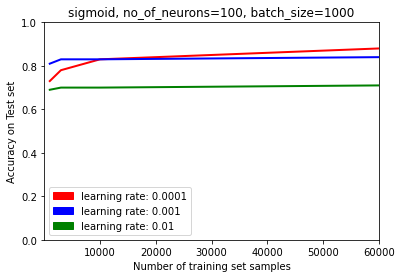

In [815]:
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
  
# x axis values 
x = [1000,3000,10000,60000] 

# corresponding y axis values 
no1 = [0.73,0.78,0.83,0.88] 
no2 = [0.81,0.83,0.83,0.84] 
no3 = [0.69,0.70,0.70,0.71]
  
# plotting the points  
plt.plot(x, no1, color='red', linewidth = 2) 
plt.plot(x, no2, color='blue', linewidth = 2) 
plt.plot(x, no3, color='green', linewidth = 2) 

red = mpatches.Patch(color='red', label='learning rate: 0.0001')
blue = mpatches.Patch(color='blue', label='learning rate: 0.001')
green = mpatches.Patch(color='green', label='learning rate: 0.01')
plt.legend(handles=[red,blue,green])
  
# setting x and y axis range 
plt.ylim(0,1) 
plt.xlim(1,60000) 
  
# naming the x axis 
plt.xlabel('Number of training set samples') 
# naming the y axis 
plt.ylabel('Accuracy on Test set') 
  
# giving a title to my graph 
plt.title('sigmoid, no_of_neurons=100, batch_size=1000') 
  
# function to show the plot 
plt.show() 

## Πειραματισμός με διαφορετικές activation functions ( συγκρίσεις ακρίβειας ως προς πλήθος νευρώνων )

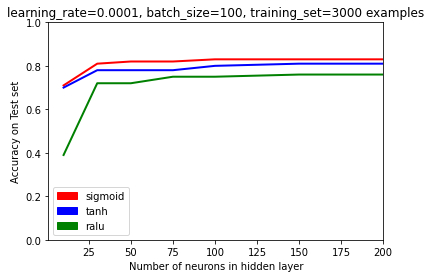

In [816]:
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
  
# x axis values 
x = [10,30,50,75,100,150,200] 
# corresponding y axis values 
no1 = [0.71,0.81,0.82,0.82,0.83,0.83,0.83] 
no2 = [0.70,0.78,0.78,0.78,0.80,0.81,0.81] 
no3 = [0.39,0.72,0.72,0.75,0.75,0.76,0.76]
  
# plotting the points  
plt.plot(x, no1, color='red', linewidth = 2) 
plt.plot(x, no2, color='blue', linewidth = 2) 
plt.plot(x, no3, color='green', linewidth = 2) 

red = mpatches.Patch(color='red', label='sigmoid')
blue = mpatches.Patch(color='blue', label='tanh')
green = mpatches.Patch(color='green', label='ralu')
plt.legend(handles=[red,blue,green])
  
# setting x and y axis range 
plt.ylim(0,1) 
plt.xlim(1,200) 
  
# naming the x axis 
plt.xlabel('Number of neurons in hidden layer') 
# naming the y axis 
plt.ylabel('Accuracy on Test set') 
  
# giving a title to my graph 
plt.title('learning_rate=0.0001, batch_size=100, training_set=3000 examples') 
  
# function to show the plot 
plt.show() 

## Πειραματισμός με Batch Sizes ( συγκρίσεις χρόνου και ακρίβειας )

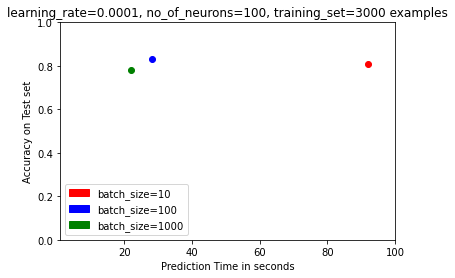

In [817]:
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
  
# x axis values 
x1 = [92]
x2 = [28]
x3 = [22]

# corresponding y axis values 
no1 = [0.81] 
no2 = [0.83] 
no3 = [0.78]
  
# plotting the points  
plt.plot(x1, no1, 'ro') 
plt.plot(x2, no2, 'bo') 
plt.plot(x3, no3, 'go') 

red = mpatches.Patch(color='red', label='batch_size=10')
blue = mpatches.Patch(color='blue', label='batch_size=100')
green = mpatches.Patch(color='green', label='batch_size=1000')
plt.legend(handles=[red,blue,green])
  
# setting x and y axis range 
plt.ylim(0,1) 
plt.xlim(1,100) 
  
# naming the x axis 
plt.xlabel('Prediction Time in seconds') 
# naming the y axis 
plt.ylabel('Accuracy on Test set') 
  
# giving a title to my graph 
plt.title('learning_rate=0.0001, no_of_neurons=100, training_set=3000 examples') 
  
# function to show the plot 
plt.show() 

## Πειραματισμός με διαφορετικό πλήθος από layer ( συγκρίσεις ακρίβειας ως προς πλήθος νευρώνων )

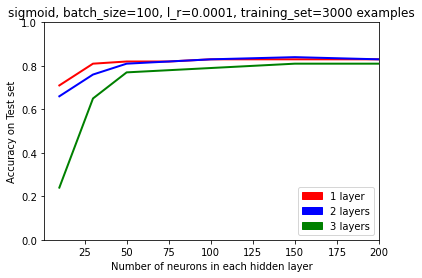

In [818]:
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
  
# x axis values 
x = [10,30,50,75,100,150,200] 

# corresponding y axis values 
no1 = [0.71,0.81,0.82,0.82,0.83,0.83,0.83] 
no2 = [0.66,0.76,0.81,0.82,0.83,0.84,0.83] 
no3 = [0.24,0.65,0.77,0.78,0.79,0.81,0.81]
  
# plotting the points  
plt.plot(x, no1, color='red', linewidth = 2) 
plt.plot(x, no2, color='blue', linewidth = 2) 
plt.plot(x, no3, color='green', linewidth = 2) 

red = mpatches.Patch(color='red', label='1 layer')
blue = mpatches.Patch(color='blue', label='2 layers')
green = mpatches.Patch(color='green', label='3 layers')
plt.legend(handles=[red,blue,green])
  
# setting x and y axis range 
plt.ylim(0,1) 
plt.xlim(1,200) 
  
# naming the x axis 
plt.xlabel('Number of neurons in each hidden layer') 
# naming the y axis 
plt.ylabel('Accuracy on Test set') 
  
# giving a title to my graph 
plt.title('sigmoid, batch_size=100, l_r=0.0001, training_set=3000 examples') 
  
# function to show the plot 
plt.show() 

## Πειραματισμός με Shuffling των δεδομένων για κάθε εποχή ( συγκρίσεις ακρίβειας ως προς πλήθος training δεδομένων )

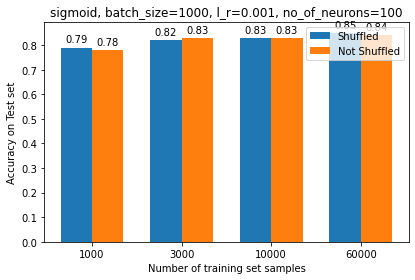

In [819]:

labels = ['1000', '3000', '10000', '60000']
shuffled = [0.79, 0.82, 0.83, 0.85]
unshuffled = [0.78, 0.83, 0.83 , 0.84]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, shuffled, width, label='Shuffled')
rects2 = ax.bar(x + width/2, unshuffled, width, label='Not Shuffled')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy on Test set')
ax.set_xlabel('Number of training set samples')
ax.set_title('sigmoid, batch_size=1000, l_r=0.001, no_of_neurons=100')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Πειραματισμός με διαφορετικά μεγέθη δεδομένων εκπαίδευσης ( συγκρίσεις ακρίβειας ως προς διαφορετικό πλήθος νευρώνων και hidden layers  )

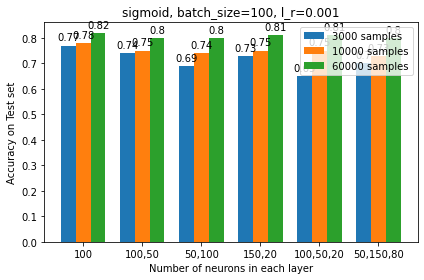

In [820]:
labels = ['100', '100,50', '50,100', '150,20', '100,50,20', '50,150,80']
samples3 = [0.77, 0.74, 0.69, 0.73, 0.65, 0.70 ]
samples10 = [0.78, 0.75, 0.74, 0.75, 0.75, 0.73 ]
samples60 = [0.82, 0.80, 0.80 , 0.81, 0.81, 0.80]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, samples3, width, label='3000 samples')
rects2 = ax.bar(x , samples10, width, label='10000 samples')
rects3 = ax.bar(x + width, samples60, width, label='60000 samples')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy on Test set')
ax.set_xlabel('Number of neurons in each layer')
ax.set_title('sigmoid, batch_size=100, l_r=0.001')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

## Σύγκριση ακρίβειας μεταξύ πρόβλεψης στο training set και στο test set

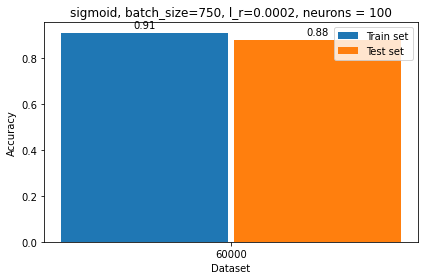

In [821]:
labels = ['60000']
train1 = [0.91]
test1 = [0.88]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, train1, width/1.55, label='Train set')
rects2 = ax.bar(x + width/3, test1, width/1.55, label='Test set')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Dataset')
ax.set_title('sigmoid, batch_size=750, l_r=0.0002, neurons = 100')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# MY IMPLEMENTATION OF MULTILAYER PERCEPTRON WITH 1 HIDDEN LAYER

In [822]:
# Smaller train set of 3000 rows
# Transform y dataset with one hot encoding.

small_x_train, small_y_train = create_dataset(3000)

enc = OneHotEncoder()
small_y_train = small_y_train.reshape(-1, 1)
enc.fit(small_y_train)
small_y_train = enc.transform(small_y_train)

small_x_train.shape, small_y_train.shape

((3000, 784), (3000, 10))

In [823]:
# Smaller test set of 3000 rows
# Transform y dataset with one hot encoding.

small_x_test, small_y_test = create_test_dataset(3000)

enc = OneHotEncoder()
small_y_test = small_y_test.reshape(-1, 1)
enc.fit(small_y_test)
small_y_test = enc.transform(small_y_test)

small_x_test.shape, small_y_test.shape

((3000, 784), (3000, 10))

In [824]:
np.random.seed(0)


def sigmoid(u):
    return 1/(1+np.exp(-u))

def sigmoid_prime(u):
    return sigmoid(u)*(1-sigmoid(u))

def loss(y,a):
    return (a-y.toarray())


# 1 Hidden Layer only

def init_model(nn_i,nn_h1,nn_o):

    w1 = np.random.randn(nn_i, nn_h1)      # Random weights for 1st layer                       (CAN TRY WITH ZEROS TOO)
    
    b1 = np.zeros((1, nn_h1))              # Zeros as bias for 1st layer 
    
    w2 = np.random.randn(nn_h1, nn_h1)     # Random weights for 2nd layer
    
    b2 = np.zeros((1, nn_h1))              # Zeros as bias for 2nd layer
    
    w3 = np.random.rand(nn_h1, nn_o)       # Random weights for 3rd layer 
    
    b3 = np.zeros((1, nn_o))               # Zeros as bias for 3rd layer
    
    # Build the model and return it
    
    model = {'w1':w1, 'b1':b1, 'w2':w2, 'b2':b2, 'w3':w3, 'b3':b3}
    return model


def train_model(model, x_train, y_train, learning_rate, epochs, batch_size):
    
    #Loop over epochs
    
    for i in range(epochs):

        # Forward propagation
        
        fp_results = forward_prop(model,x_train)        
        
        
        # Backpropagation
        
        grads = backward_prop(model,fp_results,y_train)
        
        
        # Gradient descent parameter update
        
        model = update_parameters(model,grads,learning_rate)
        
    return model



# The forward propagation function

def forward_prop(model,a0):
        
    # Load parameters from model
    w1, b1, w2, b2, w3, b3 = model['w1'], model['b1'], model['w2'], model['b2'], model['w3'],model['b3']
     
    # First linear step = input layer x times the dot product of the weights + our bias b
    u1 = a0.dot(w1) + b1

    # First activation function
    a1 = sigmoid(u1)                
    
    # Second linear step
    u2 = a1.dot(w2) + b2
    
    # Second activation function
    a2 = sigmoid(u2)
    
    # Third linear step
    u3 = a2.dot(w3) + b3
    
    # For the Third linear activation function (last layer) either the sigmoid or softmax should be used.
    a3 = sigmoid(u3)

    #Store results and return them
    
    fp_results = {'a0':a0, 'u1':u1, 'a1':a1, 'u2':u2, 'a2':a2, 'u3':u3, 'a3':a3}
    return fp_results



# The backward propagation function

def backward_prop(model,fp_results,y):

    # Load parameters from model
    w1, b1, w2, b2, w3, b3 = model['w1'], model['b1'], model['w2'], model['b2'], model['w3'],model['b3']
    
    # Load forward propagation results
    a0, a1, a2, a3 = fp_results['a0'], fp_results['a1'], fp_results['a2'], fp_results['a3']
    
    u1, u2, u3 = fp_results['u1'], fp_results['u2'], fp_results['u3']
    
    # Get number of samples
    m = y.shape[0]
    
    # Calculate δ for output layer
    delta3 = 2*loss(y,a3)/m*sigmoid_prime(u3)

    dw3 = (a2.T).dot(delta3) 
    db3 = np.sum(delta3, axis=0)
    
    # Calculate δ for hidden layer
    delta2 = np.multiply(delta3.dot(w3.T), sigmoid_prime(a2))               
    
    dw2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0)
    
    # Calculate δ for input layer
    delta1 = np.multiply(delta2.dot(w2.T), sigmoid_prime(a1))
    
    dw1 = np.dot(a0.T, delta1)
    db1 = np.sum(delta1,axis=0)
    
    # Store gradients
    grads = {'dw3':dw3, 'db3':db3, 'dw2':dw2,'db2':db2,'dw1':dw1,'db1':db1}
    return grads


# The function to update the parameters

def update_parameters(model,grads,learning_rate):
    # Load parameters
    w1, b1, w2, b2, w3, b3 = model['w1'], model['b1'], model['w2'], model['b2'], model["w3"], model['b3']
    
    # Update parameters by applying Gradient Descent Update (Also called Vanilla Update)
    
    w1 -= learning_rate * grads['dw1']
    b1 -= learning_rate * grads['db1']
    w2 -= learning_rate * grads['dw2']
    b2 -= learning_rate * grads['db2']
    w3 -= learning_rate * grads['dw3']
    b3 -= learning_rate * grads['db3']
    
    # Store and return parameters
    model = { 'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2, 'w3':w3,'b3':b3}
    return model


In [825]:
nn_i=784
nn_h1=100
nn_o=10

#print(small_y_train)

myMlp = init_model(nn_i, nn_h1, nn_o)
myMlp = train_model(myMlp, small_x_train, small_y_train, 0.0001, 200, 200)


<ipython-input-824-411e9455f2e3>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-u))
